<a href="https://colab.research.google.com/github/dipherent1/Handwriting-Calculator/blob/main/Handwriting_cal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8843 - loss: 0.4200 - val_accuracy: 0.9590 - val_loss: 0.1369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9671 - loss: 0.1156 - val_accuracy: 0.9716 - val_loss: 0.0966
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9781 - loss: 0.0757 - val_accuracy: 0.9731 - val_loss: 0.0877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9846 - loss: 0.0548 - val_accuracy: 0.9767 - val_loss: 0.0752
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0432 - val_accuracy: 0.9758 - val_loss: 0.0714
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.0819
Test accuracy: 0.9757999777793884
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


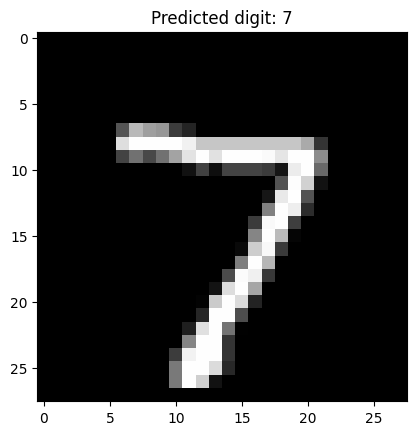

In [ ]:
# prompt: make a model that trains on human hand writing

# Install necessary libraries
!pip install tensorflow keras numpy matplotlib

# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset (a dataset of handwritten digits)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Build the model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
predictions = model.predict(x_test)

# You can now use the trained model to classify new handwritten digits.
# To do this, you would need to load and preprocess the new image in the same way as the training data.
# Then you can use model.predict() to get the predicted digit.

# Example of plotting a prediction:
plt.imshow(x_test[0], cmap='gray')
plt.title('Predicted digit: {}'.format(np.argmax(predictions[0])))
plt.show()

# Save the model in the new recommended Keras format
model.save('handwriting_model.keras')



just for one number

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Recognized Digit: 2


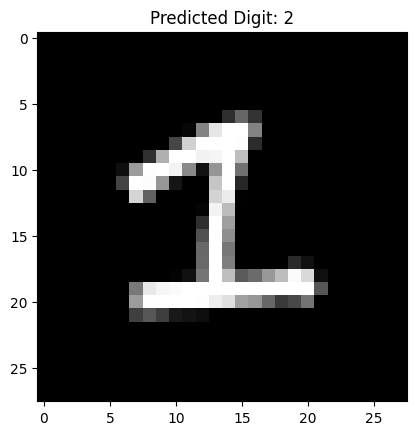

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('handwriting_model.keras')

# Load and preprocess the image
img = cv2.imread("number1-bw-bold.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Try global thresholding as an alternative to adaptive thresholding
_, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours were detected
if contours:
    # Find the largest contour, assuming it represents the digit
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box around the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Extract the region of interest (ROI) corresponding to the digit
    digit_roi = thresh[y:y + h, x:x + w]

    # Add padding around the ROI for better centering
    padded_digit = cv2.copyMakeBorder(digit_roi, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=0)

    # Resize the digit to 28x28 pixels, as expected by the model
    resized_digit = cv2.resize(padded_digit, (28, 28), interpolation=cv2.INTER_AREA)

    # Normalize the pixel values to the range [0, 1]
    normalized_digit = resized_digit.astype('float32') / 255.0

    # Expand dimensions to match the input shape of the model (1, 28, 28, 1)
    input_digit = np.expand_dims(normalized_digit, axis=0)
    input_digit = np.expand_dims(input_digit, axis=-1)

    # Predict the digit
    prediction = model.predict(input_digit)
    predicted_digit = np.argmax(prediction)

    # Output the recognized digit
    print("Recognized Digit:", predicted_digit)

    # Visualize the processed digit
    plt.imshow(resized_digit, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.show()
else:
    print("No contours detected.")


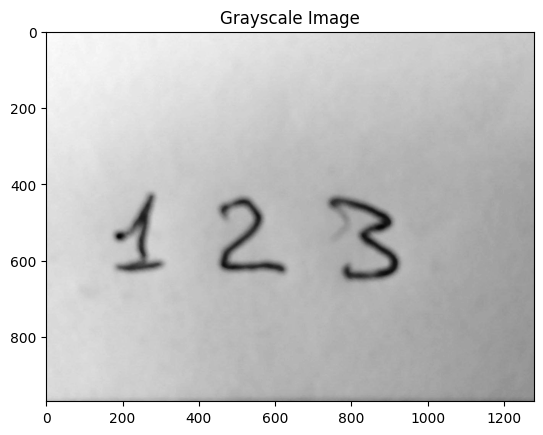

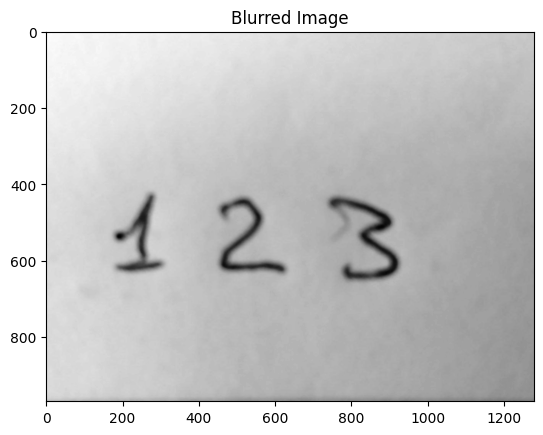

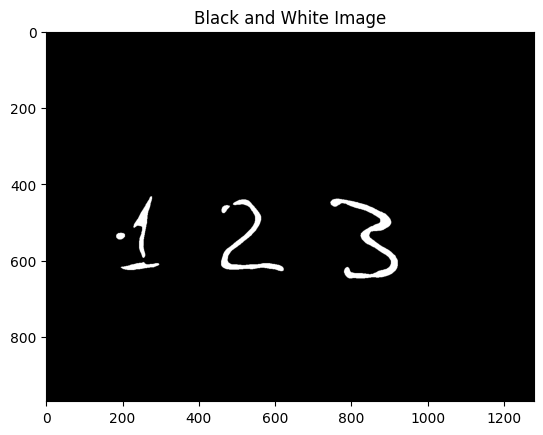

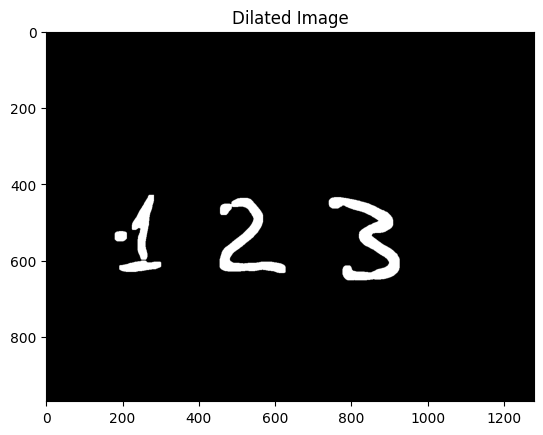

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


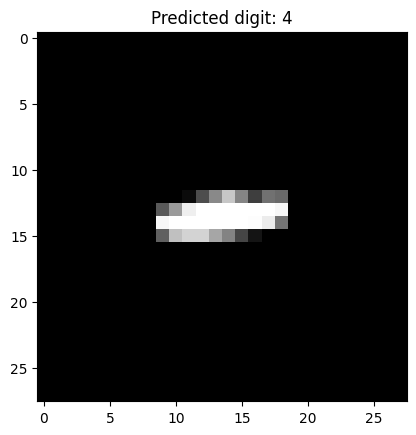

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


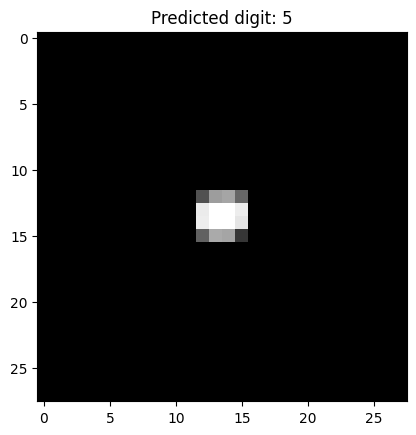

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


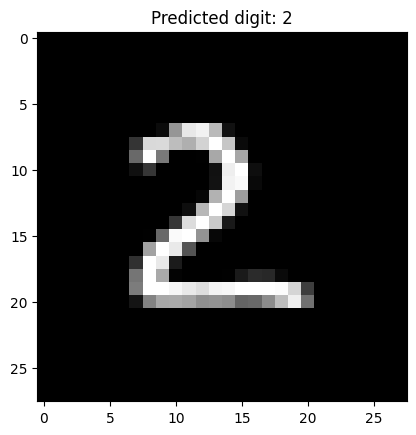

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


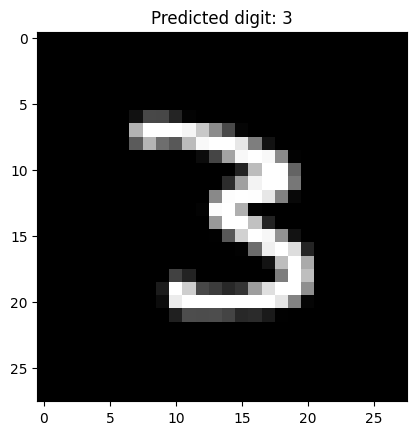

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


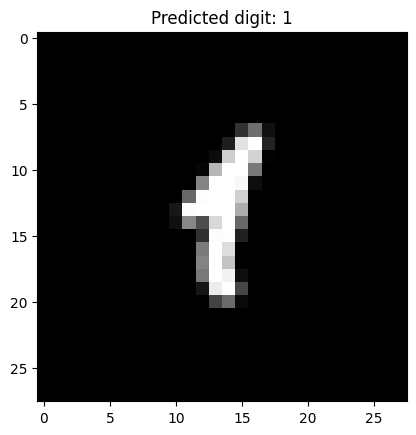

Recognized Digits: [4, 5, 2, 3, 1]


In [8]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('handwriting_model.keras')

# Load the image in grayscale (black and white)
img = cv2.imread("numbers-refined.jpg", cv2.IMREAD_GRAYSCALE)

# Show the original grayscale image
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.show()

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Show the blurred image
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.show()

# Apply global thresholding to convert to black and white
_, thresh = cv2.threshold(blurred, 80, 255, cv2.THRESH_BINARY_INV)

# Show the thresholded (black and white) image
plt.imshow(thresh, cmap='gray')
plt.title("Black and White Image")
plt.show()

# Apply dilation to close small gaps within digits
kernel = np.ones((10, 10), np.uint8)  # Experiment with kernel size
dilated = cv2.dilate(thresh, kernel, iterations=1)

# Show the dilated image
plt.imshow(dilated, cmap='gray')
plt.title("Dilated Image")
plt.show()

# Find contours
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Array to store recognized digits
recognized_digits = []

for cnt in contours:
    if cv2.contourArea(cnt) < 200:  # filter small contours
        continue

    # Get bounding box for the contour
    x, y, w, h = cv2.boundingRect(cnt)

    # Extract the digit region of interest
    digit_roi = dilated[y:y + h, x:x + w]

    # Add larger padding to ensure the digit is centered and not split
    padded_digit = cv2.copyMakeBorder(digit_roi, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=0)

    # Resize to (28, 28) for the model input
    resized_digit = cv2.resize(padded_digit, (28, 28), interpolation=cv2.INTER_AREA)

    # Normalize the pixel values
    normalized_digit = resized_digit.astype('float32') / 255.0

    # Prepare the digit for model input
    input_digit = np.expand_dims(normalized_digit, axis=0)
    input_digit = np.expand_dims(input_digit, axis=-1)

    # Predict the digit
    prediction = model.predict(input_digit)
    predicted_digit = np.argmax(prediction)
    recognized_digits.append(predicted_digit)

    # Visualize the processed digit
    plt.imshow(resized_digit, cmap='gray')
    plt.title(f"Predicted digit: {predicted_digit}")
    plt.show()

# Print the recognized digits
print("Recognized Digits:", recognized_digits)


In [ ]:
print(recognized_digits)

[2, 5]
